# Machine Learning with White Wine Quality data 

## Project Steps Summary
### 1) Data Exploratory Analysis
### 2) Principle Component Analysis
### 3) Prediction and Model selection

In [1]:
# Importing libraries to be used and csv data file
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("winequality.csv")

### Data Exploratory Analysis 

In [2]:
# Getting an idea of what our data looks like
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


> There aren't any null values and all data types are workable

In [4]:
data['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

> wine quality rating varies between 3 and 9

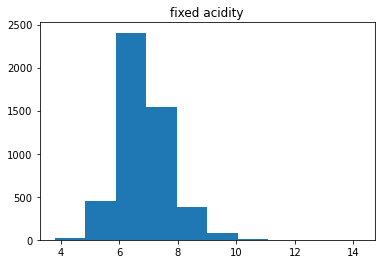

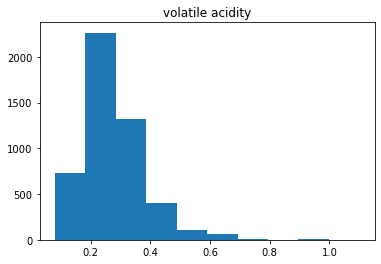

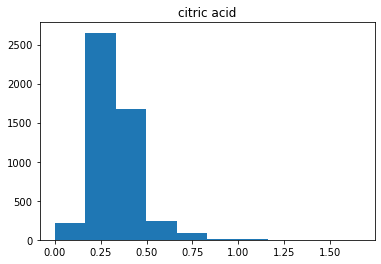

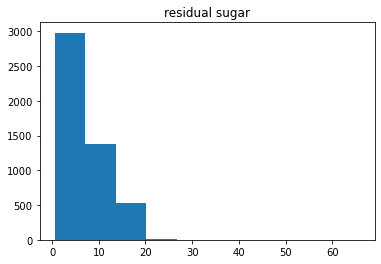

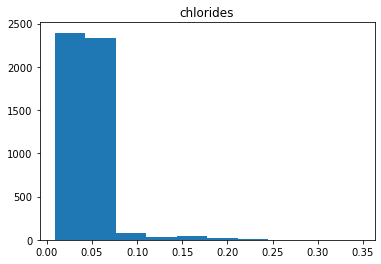

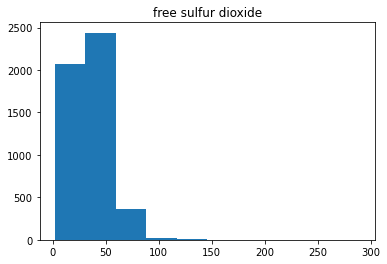

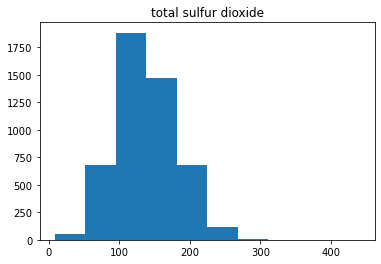

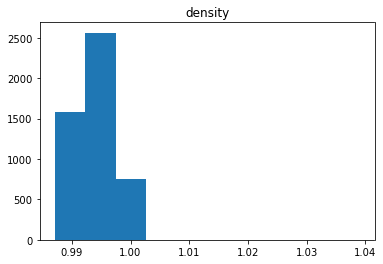

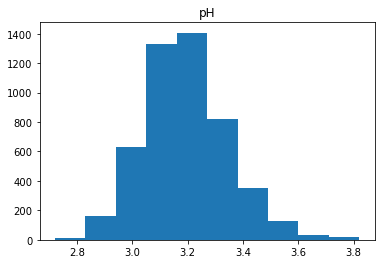

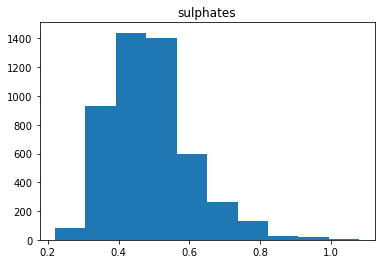

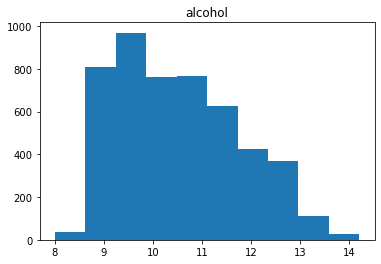

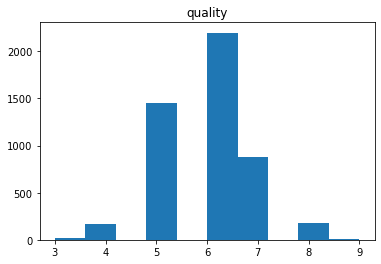

In [5]:
# checking distributions of data for each column
for i in data.columns:
    plt.hist(data[i])
    plt.title(i)
    plt.show()

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

<AxesSubplot:>

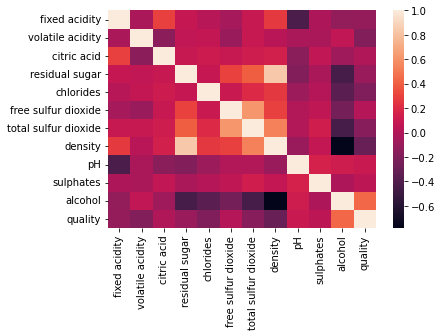

In [6]:
# plotting correlations
print(data.corr())
sns.heatmap(data.corr())

> There are correlations between quality and alcohol, pH, sulphates, citric acid, and free sulfur dioxides

/usr/local/anaconda3/envs/pyenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

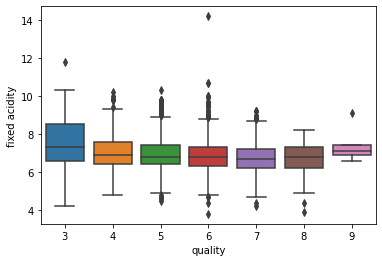

In [7]:
# plotting boxplot for each variable against target variable to check for outliers
sns.boxplot('quality', 'fixed acidity', data = data)

/usr/local/anaconda3/envs/pyenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

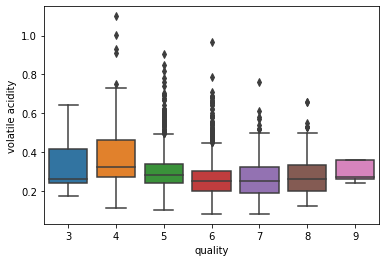

In [8]:
sns.boxplot('quality', 'volatile acidity', data = data)

/usr/local/anaconda3/envs/pyenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='citric acid'>

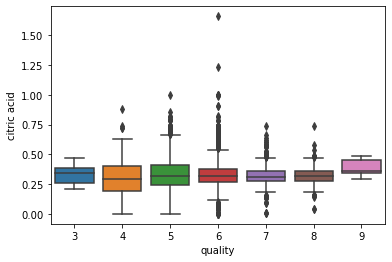

In [9]:
sns.boxplot('quality', 'citric acid', data = data)

/usr/local/anaconda3/envs/pyenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

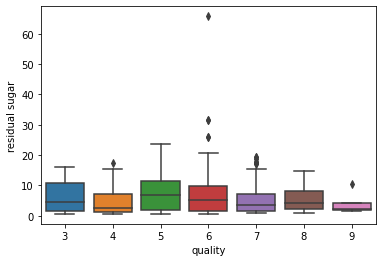

In [10]:
sns.boxplot('quality', 'residual sugar', data = data)

/usr/local/anaconda3/envs/pyenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='chlorides'>

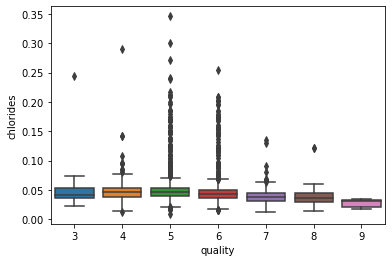

In [11]:
sns.boxplot('quality', 'chlorides', data = data)

/usr/local/anaconda3/envs/pyenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

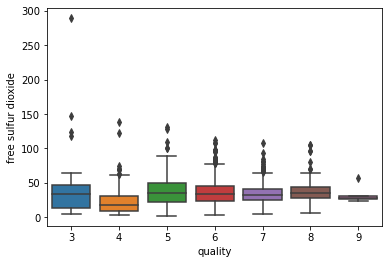

In [12]:
sns.boxplot('quality', 'free sulfur dioxide', data = data)

/usr/local/anaconda3/envs/pyenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

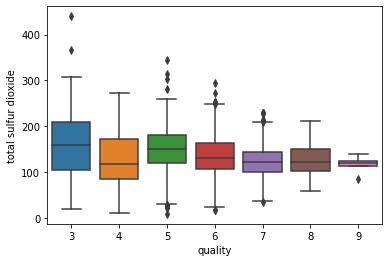

In [13]:
sns.boxplot('quality', 'total sulfur dioxide', data = data)

/usr/local/anaconda3/envs/pyenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='density'>

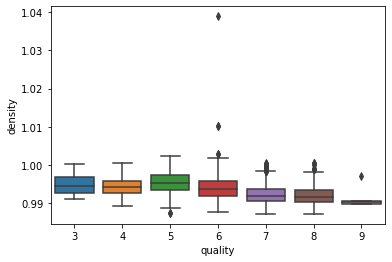

In [14]:
sns.boxplot('quality', 'density', data = data)

/usr/local/anaconda3/envs/pyenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='pH'>

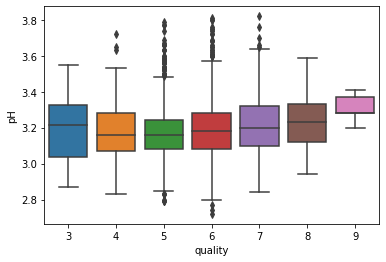

In [15]:
sns.boxplot('quality', 'pH', data = data)

/usr/local/anaconda3/envs/pyenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='sulphates'>

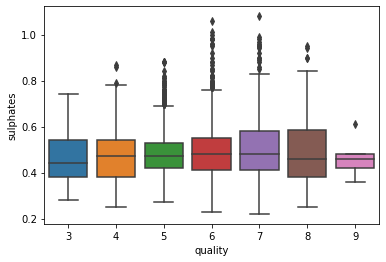

In [16]:
sns.boxplot('quality', 'sulphates', data = data)

/usr/local/anaconda3/envs/pyenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

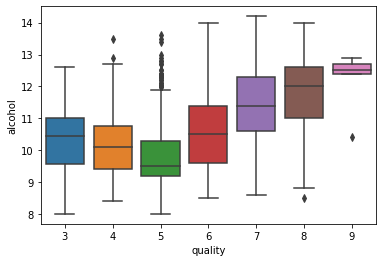

In [17]:
sns.boxplot('quality', 'alcohol', data = data)

> There are many otliers in multiple columns

In [18]:
# Trying to find out why there are outliers
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


> fixed acidity and volatile acidity don't have a high variance. Citric acid is normally distributed. Residual sugar has a minimum of .6 and max of 65 – VERY large difference. The same thing can be seen with chlorides, free sulfur dioxide, and total sulfure dioxide.

In [19]:
# Now I will convert 'quality' into 3 different categories under a new column 'qlty_cat': 
# 1 = "bad" (1, 2, 3)
# 2 = "average"(4, 5, 6)
# 3 = "excellent" (7, 8, 9)

qlty_cat = []
for i in data['quality']:
    if i >= 1 and i <= 3:
        qlty_cat.append('1')
    elif i >= 4 and i <= 6:
        qlty_cat.append('2')
    elif i >= 7 and i <= 9:
        qlty_cat.append('3')
data['Qlty_Cat'] = qlty_cat

In [20]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Qlty_Cat'],
      dtype='object')

In [21]:
data["Qlty_Cat"].unique()

array(['2', '3', '1'], dtype=object)

#### Splitting x and y variables

In [22]:
x = data.iloc[:,:11]
y = data['Qlty_Cat']

In [23]:
x.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0


In [24]:
y.head(10)

0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
Name: Qlty_Cat, dtype: object

### PCA Analysis

#### Using StandardScaler to normalize data for PCA

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
print(x)

[[ 1.72096961e-01 -8.17699008e-02  2.13280202e-01 ... -1.24692128e+00
  -3.49184257e-01 -1.39315246e+00]
 [-6.57501128e-01  2.15895632e-01  4.80011213e-02 ...  7.40028640e-01
   1.34184656e-03 -8.24275678e-01]
 [ 1.47575110e+00  1.74519434e-02  5.43838363e-01 ...  4.75101984e-01
  -4.36815783e-01 -3.36667007e-01]
 ...
 [-4.20473102e-01 -3.79435433e-01 -1.19159198e+00 ... -1.31315295e+00
  -2.61552731e-01 -9.05543789e-01]
 [-1.60561323e+00  1.16673788e-01 -2.82557040e-01 ...  1.00495530e+00
  -9.62604939e-01  1.85757201e+00]
 [-1.01304317e+00 -6.77100966e-01  3.78559282e-01 ...  4.75101984e-01
  -1.48839409e+00  1.04489089e+00]]


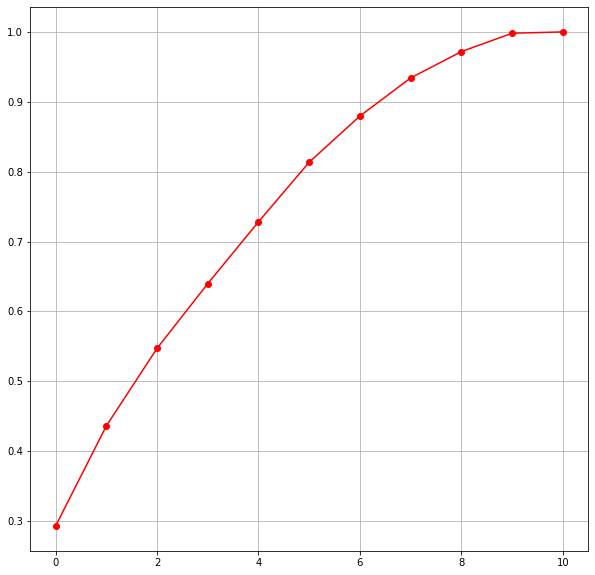

In [26]:
# performing PCA
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

# plotting graph to find principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

> As we can see from the graph, 7 components accounts for over 90% of the variation in the data. Therefore I will choose 7 as the number of components for my prediction.

In [27]:
pca_new = PCA(n_components = 7)
x_new = pca_new.fit_transform(x)
print(x_new)

[[ 3.67694351 -0.54523329 -0.93042188 ... -0.29285477 -0.89162041
   0.20466402]
 [-0.64458784  0.43076995 -0.3563307  ... -0.71407766 -0.48373761
   0.4369978 ]
 [ 0.15529055 -1.18979993 -0.01753152 ... -0.36770586 -0.50068158
   0.5543186 ]
 ...
 [-0.77973054 -0.40848012 -0.66467688 ... -0.80827946  0.13379125
  -1.61648248]
 [-3.40730151  0.9157439  -0.26829676 ... -0.0807054   0.49713543
   0.97853291]
 [-2.8232115  -0.13093864  0.21388983 ... -0.88063517  0.55030897
   0.96572294]]


Splitting the data into train and test

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.25)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3673, 7)
(3673,)
(1225, 7)
(1225,)


### Data Modeling

 We will use 5 different algorithms:
 1) Logistic Regression
 
 2) Decision Tree
 
 3) Naive Bayes
 
 4) Random Forest
 
 5) SVM

#### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

In [30]:
# print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[  0   6   0]
 [  0 924  42]
 [  0 205  48]]
79.3469387755102


>79% accuracy with regression


#### Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_predict = dt.predict(x_test)

In [32]:
# print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[  0   5   1]
 [  6 843 117]
 [  1  96 156]]
81.55102040816327


>82% accuracy with decision tree


#### Naive-Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_predict = nb.predict(x_test)

In [34]:
# print confusion matrix and accuracy score
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
print(nb_conf_matrix)
print(nb_acc_score * 100)

[[  2   4   0]
 [ 31 894  41]
 [  1 190  62]]
78.20408163265307


>78% accuracy with NB

#### Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)

In [36]:
# print confusion matrix and accuracy score
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score * 100)

[[  0   6   0]
 [  0 936  30]
 [  0 124 129]]
86.93877551020408


>85% accuracy with random forest

#### SVM using random forest kernel

In [37]:
from sklearn.svm import SVC

In [38]:
rbf_svc = SVC()
rbf_svc.fit(x_train, y_train)
rbf_svc = rf.predict(x_test)

In [39]:
# print confusion matrix and accuracy score
rbf_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
rbf_svc_acc_score = accuracy_score(y_test, rf_predict)
print(rbf_svc_conf_matrix)
print(rbf_svc_acc_score * 100)

[[  0   6   0]
 [  0 936  30]
 [  0 124 129]]
86.93877551020408


> Same accuracy score as RF

#### SVM using linear kernel 

In [40]:
lin_svc = SVC(kernel='linear')
lin_svc.fit(x_train,y_train)
lin_svc = rf.predict(x_test)

In [41]:
lin_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
lin_svc_acc_score = accuracy_score(y_test, rf_predict)
print(lin_svc_conf_matrix)
print(lin_svc_acc_score * 100)

[[  0   6   0]
 [  0 936  30]
 [  0 124 129]]
86.93877551020408


> Same accuracy score as previous two algorithms

**Random Forest appears to be the most accurate algorithm for this data set. I could use feature engineering to trim down the number of predictos and improve accuracy, but this will do for now.**